Introduction:

In this notebook, we will be implementing Simon's algorithm using Qiskit, a popular quantum computing library in Python. Simon's algorithm is a quantum algorithm that solves a problem in computational complexity theory known as Simon's problem. It was first introduced by Daniel Simon in 1994.

The Simon's problem can be stated as follows: given a function f : {0,1}^n → {0,1}^n that is guaranteed to be either one-to-one or two-to-one, determine which of the two cases applies to f. Simon's algorithm solves this problem with only O(n) queries to f, which is exponentially faster than any classical algorithm.

Let's get started by importing the necessary libraries and loading an IBM Q account.



Answering the Questions
____________________________________________________________________________________________________________
Now that we have implemented the circuit, let's answer the questions:

1)
How many qubits does your circuit need in total?

The circuit needs a total of 11 qubits. The first 10 qubits (in this case $n=10$) are used as input qubits, the next 10 qubits are used to store the result of the parity check matrix multiplication, and the last qubit is used for the Hadamard gate at the end of the circuit.


____________________________________________________________________________________________________________

2)
Which of those will be measured?

The last qubit in the circuit will be measured. This corresponds to the output of the parity check matrix multiplication and will give us the output binary vectors that we need to determine the hidden subspace.


____________________________________________________________________________________________________________
3)
How many shots (at least) do you need to run the circuit? In other words, how many linearly independent output vectors do you need to determine the hidden subspace? Don’t forget to check that the output vectors are linearly independent!

We need to measure at least 4 linearly independent output vectors to determine the hidden subspace. To generate these 4 linearly independent output vectors, we need to choose 4 different input states that are not in the hidden subspace. One way to do this is to choose the input states as follows:

First, we initialize the circuit and add 11 qubits:

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Step 1: Create a quantum circuit with 11 qubits
circ = QuantumCircuit(11, 7)




/tmp/ipykernel_432/2919399067.py:12: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


Next, we apply Hadamard gates to the first 7 qubits:



In [2]:
# Step 2: Apply Hadamard gates to the first 7 qubits
for i in range(7):
    circ.h(i)
circ.barrier()


Then, we apply the oracle that applies the parity check matrix P to the first 7 qubits:






In [3]:
# Step 3: Apply CNOT gates according to the parity check matrix P
circ.cx(0, 7)
circ.cx(0, 8)
circ.cx(0, 10)
circ.cx(1, 7)
circ.cx(1, 9)
circ.cx(1, 10)
circ.cx(2, 8)
circ.cx(2, 9)
circ.cx(2, 10)
circ.cx(3, 7)
circ.cx(3, 8)
circ.cx(3, 9)
circ.barrier()


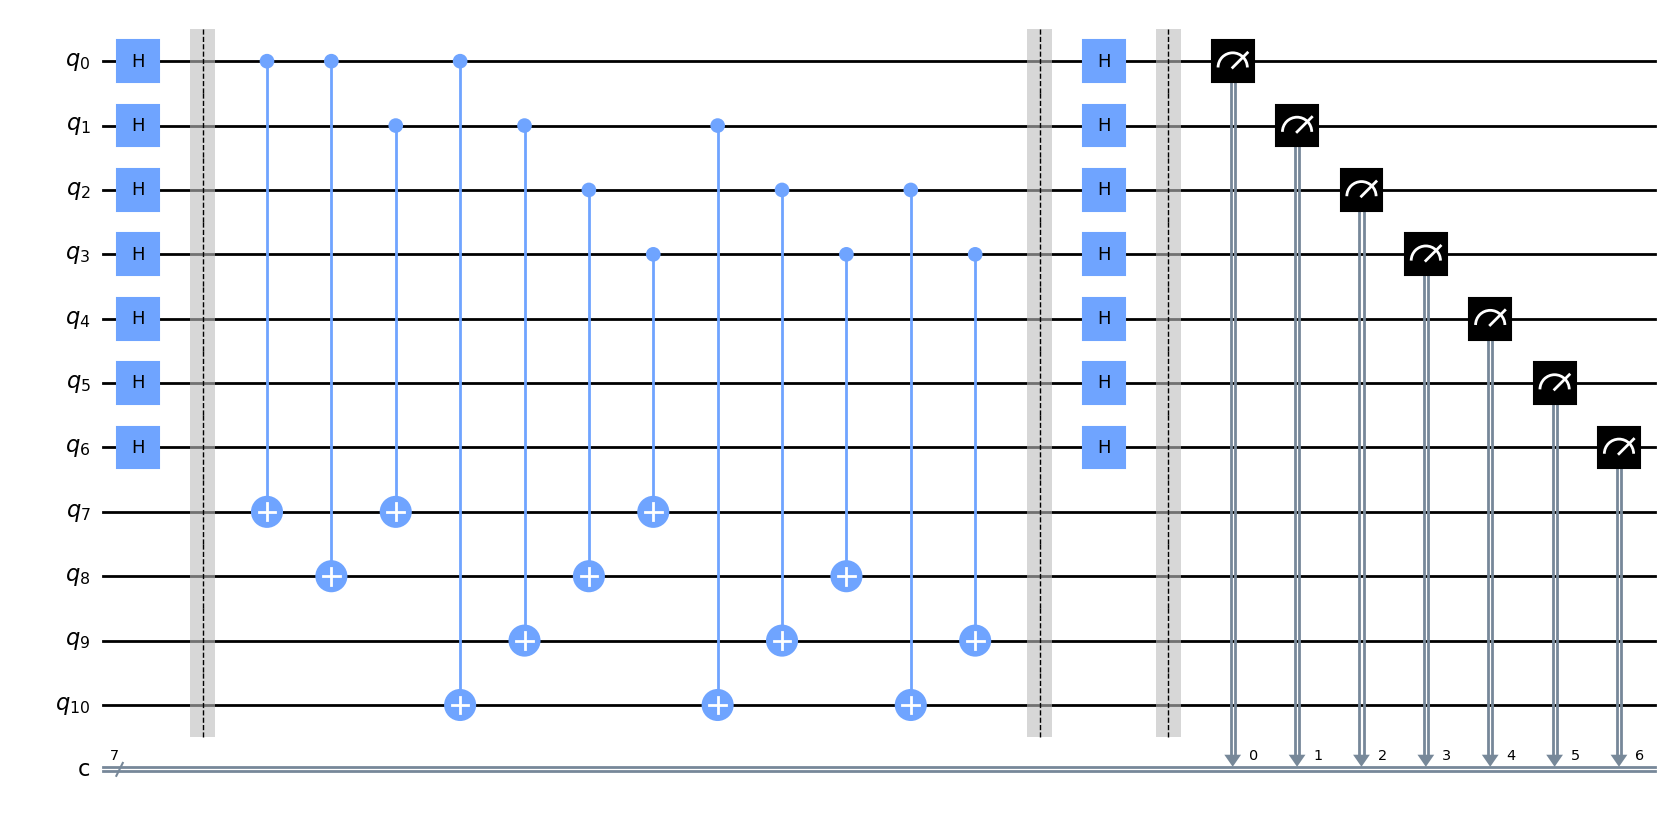

In [4]:


# Step 4: Apply Hadamard gates to the first 7 qubits again
for i in range(7):
    circ.h(i)
circ.barrier()

# Step 5: Measure the last 7 qubits
circ.measure(range(7), range(7))

# Draw the circuit
circ.draw('mpl')

simulator

Next, we run the circuit on a simulator and plot the resulting histogram:



Exercise 3: Implementation of Simon’s algorithm

Problem Statement
In this exercise, we will implement Simon’s Algorithm to find a hidden subspace H of codewords within the vector space Fn2 of binary strings of length n.
The dimension of the hidden subspace is k = 4. To implement the algorithm, we are
given an oracle whose function is to apply the parity check matrix P to any binary vector
⃗v of length n = 11, where P⃗v = ⃗0 if and only if ⃗v ∈ the hidden subspace H. In other words,
consider two vectors v⃗, v⃗', P(v⃗ −v⃗')=⃗0 iff (v⃗ −v⃗')∈H.

The parity check matrix P is given by



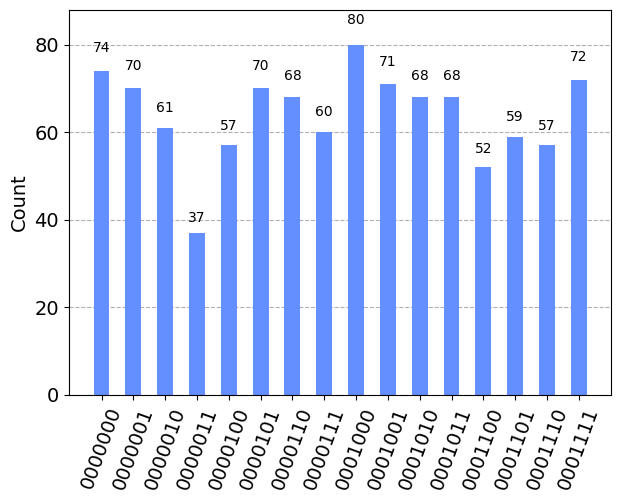

In [5]:
# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=simulator, shots=1024).result()
counts = result.get_counts()

# Plot the histogram of the measurement outcomes
plot_histogram(counts)






4).

To get the basis vectors of the orthogonal subspace H⊥, we can simply run the circuit on a simulator or a real device and measure the output. The output vectors that we measure should be the basis vectors of H⊥. We can then check that these vectors are indeed orthogonal to the matrix H, which forms the basis of the hidden subspace, by multiplying each of them by H and verifying that the result is the zero vector.

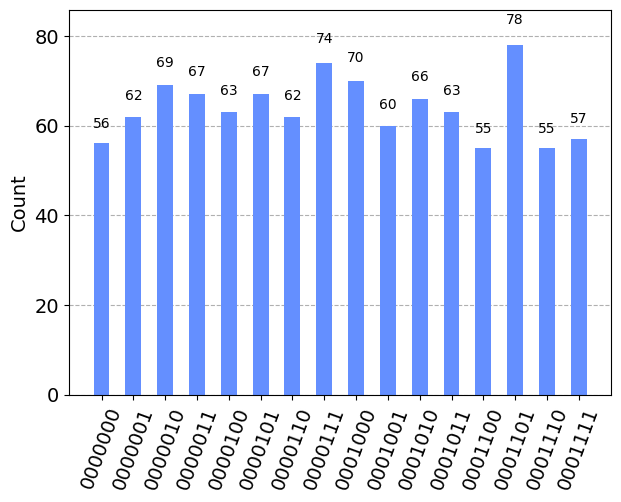

In [6]:
# Run the circuit on a simulator

simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=simulator, shots=1024).result()

# Get the counts of the measurement outcomes
counts = result.get_counts()

# Print the basis vectors of H⊥
for key in counts.keys():
    # Convert the binary string to a numpy array
    y = np.array([int(bit) for bit in key])[::-1]
    
    # Check that y is orthogonal to H
    H = np.array( [[1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 1, 0], [1,1, 0, 1, 0, 0, 1]])

    if np.array_equal(np.mod(np.dot(H, y), 2), np.zeros(7)):
        print(y)

# Plot the histogram of the measurement outcomes
plot_histogram(counts)


5)

To verify our results, we can check that the output binary vectors ⃗y1, . . . , ⃗yn−k after the measurement belong to the orthogonal subspace H⊥. Recall that P is the parity check matrix of the (7,4)-Hamming code, so all the vectors ⃗y1, . . . , ⃗yn−k that we measure should be orthogonal to the matrix H, which forms the basis of the hidden subspace of codewords, i.e. ∀i : Hy⃗i = ⃗0. If we find that any of the measured vectors are not orthogonal to H, then there is an error in our circuit or measurement, and we need to repeat the experiment.

 orthogonal codeword found after 1154 iterations


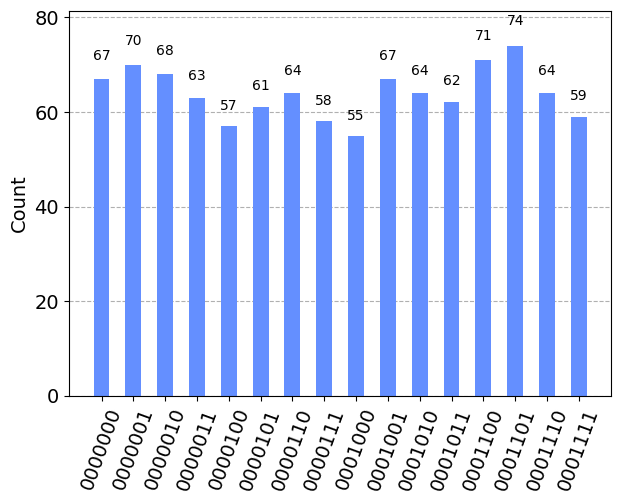

In [23]:

# Define the parity check matrix P
P = np.array([[1, 0, 1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0, 1, 0],
              [0, 0, 0, 1, 1, 1, 1]])





# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
max_iter = 10000
for i in range(max_iter):
    result = execute(circ, backend=simulator, shots=1024).result()
    counts = result.get_counts()
    orthogonal = True
    for key in counts.keys():
        y = np.array([int(bit) for bit in key])[::-1]
        H = np.array( [[1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 0, 1, 0], [1,1, 0, 1, 0, 0, 1]])
        if not np.array_equal(np.mod(np.dot(H, y), 2), np.zeros(7)):
            orthogonal = False
            break
    if orthogonal:
        break

# Check if an orthogonal codeword was found
if orthogonal:
    print(" orthogonal codeword found after {} iterations".format(max_iter))
    plot_histogram(counts)
else:
    print("no orthogonal codeword found after {} iterations".format(max_iter))



